In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
df=pd.read_excel('cleaneddataset.xlsx')

In [17]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Rating', 'Company Name', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'Job_state', 'avg_salary', 'same_state', 'age', 'python',
       'Rstudio', 'spark', 'aws', 'excel', 'tableau'],
      dtype='object')

In [18]:
df

,Unnamed: 0,Job Title,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,...,Job_state,avg_salary,same_state,age,python,Rstudio,spark,aws,excel,tableau
0,0,Data Scientist,3.8,Tecolote Research\n,"Goleta, CA",501.0,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,...,NM,72000.0,0,51,1,0,0,0,1,1
1,1,Healthcare Data Scientist,3.4,University of Maryland Medical System\n,"Baltimore, MD",10000.0,1984,Other Organization,Health Care Services & Hospitals,Health Care,...,MD,87500.0,0,40,1,0,0,0,0,0
2,2,Data Scientist,4.8,KnowBe4\n,"Clearwater, FL",501.0,2010,Company - Private,Security Services,Business Services,...,FL,85000.0,1,14,1,0,1,0,1,0
3,3,Data Scientist,3.8,PNNL\n,"Richland, WA",1001.0,1965,Government,Energy,"Oil, Gas, Energy & Utilities",...,WA,76500.0,1,59,1,0,0,0,0,0
4,4,Data Scientist,2.9,Affinity Solutions\n,"New York, NY",51.0,1998,Company - Private,Advertising & Marketing,Business Services,...,NY,114500.0,1,26,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,950,"Sr Scientist, Immuno-Oncology - Oncology",3.9,GSK\n,"Brentford, United Kingdom",10000.0,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,...,MA,84500.0,0,194,0,0,0,1,0,0
728,951,Senior Data Engineer,4.4,Eventbrite\n,"San Francisco, CA",1001.0,2006,Company - Public,Internet,Information Technology,...,TN,102500.0,0,18,1,0,1,1,0,0
729,952,"Project Scientist - Auton Lab, Robotics Institute",2.6,Software Engineering Institute\n,"Pittsburgh, PA",501.0,1984,College / University,Colleges & Universities,Education,...,PA,73500.0,1,40,0,0,0,0,1,0
730,953,Data Science Manager,3.2,"Numeric, LLC\n","Chadds Ford, PA",1.0,-1,Company - Private,Staffing & Outsourcing,Business Services,...,PA,127500.0,0,-1,0,0,0,0,1,0


In [19]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'pricipal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'


In [20]:
df['Job_Role']=df['Job Title'].apply(title_simplifier)


In [21]:
df['Job_Role'].value_counts()

Job_Role
data scientist    278
na                176
data engineer     118
analyst           102
manager            22
mle                22
director           14
Name: count, dtype: int64

In [22]:
df['seniority']=df['Job Title'].apply(seniority)


In [23]:
df.seniority.value_counts()

seniority
na        536
senior    193
junior      3
Name: count, dtype: int64

In [24]:
df['Competitors']=df['Competitors'].apply(lambda x:0 if x==-1 else len(x.split(',')))

In [25]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [26]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\n', ''))

In [27]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [28]:
df.describe()

,Rating,Size,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python,Rstudio,spark,aws,excel,tableau
count,732.000000,730.000000,732.000000,732.000000,732.000000,732.000000,708.000000,708.000000,708.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,3.675683,2637.671233,1862.266393,1.683060,0.032787,0.012295,102991.525424,130415.254237,102991.525424,0.564208,51.023224,0.532787,0.002732,0.228142,0.240437,0.521858,0.200820
std,0.620343,3705.701210,451.353522,0.921301,0.178200,0.110275,37104.919272,44376.458125,37104.919272,0.496199,54.057964,0.499265,0.052235,0.419922,0.427641,0.499864,0.400887
min,-1.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,15500.000000,16000.000000,15500.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,201.000000,1942.750000,1.000000,0.000000,0.000000,76000.000000,98000.000000,76000.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,501.000000,1989.000000,1.000000,0.000000,0.000000,98250.000000,125000.000000,98250.000000,1.000000,28.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,5001.000000,2007.000000,3.000000,0.000000,0.000000,124000.000000,158000.000000,124000.000000,1.000000,63.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.000000,10000.000000,2019.000000,4.000000,1.000000,1.000000,254000.000000,306000.000000,254000.000000,1.000000,280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df.columns

Index(['Job Title', 'Rating', 'Company Name', 'Headquarters', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'Job_state', 'avg_salary', 'same_state', 'age', 'python',
       'Rstudio', 'spark', 'aws', 'excel', 'tableau', 'Job_Role', 'seniority'],
      dtype='object')

<Axes: >

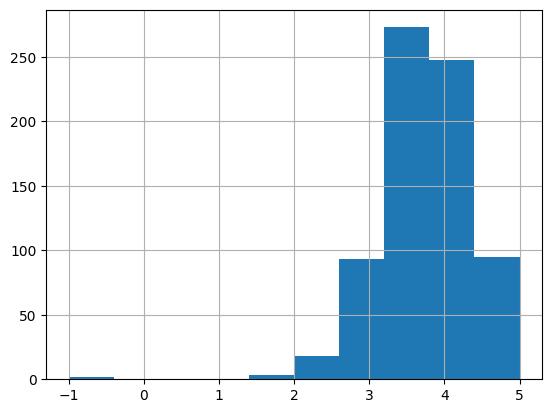

In [37]:
df.Rating.hist()

<Axes: >

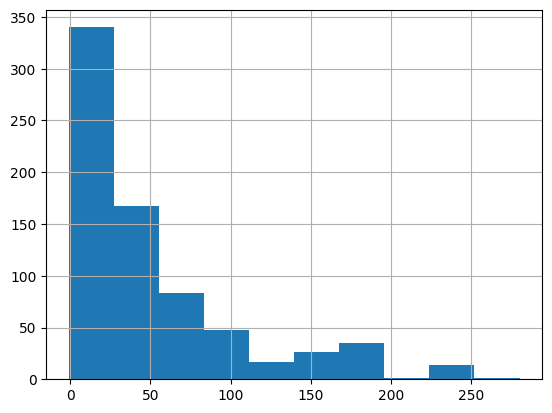

In [38]:
df.age.hist()

<Axes: >

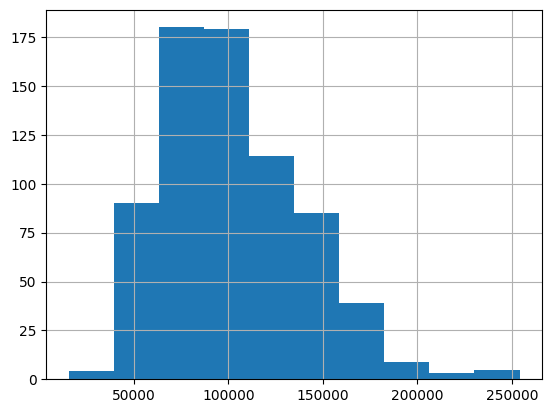

In [40]:
df.avg_salary.hist()

<Axes: >

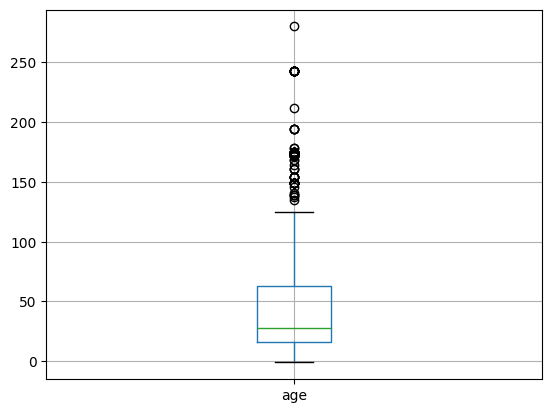

In [42]:
df.boxplot(column=['age'])

In [ ]:
df.columns dt

In [53]:
h=df[['Rating', 'Size',
       'Founded',
       'Competitors', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'same_state', 'age', 'python',
       'Rstudio', 'spark', 'aws', 'excel', 'tableau']].corr()

<Axes: >

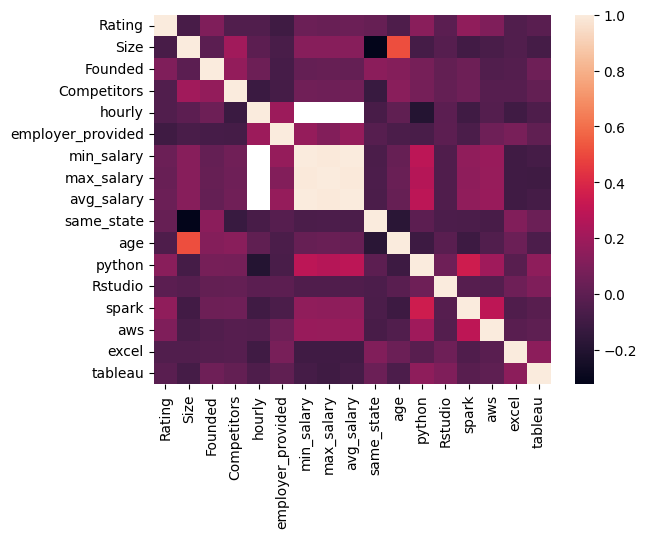

In [54]:
sns.heatmap(h)

In [56]:
catcols=df.select_dtypes(include=['object']).columns.tolist()
catcols

['Job Title',
 'Company Name',
 'Headquarters',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Job_state',
 'Job_Role',
 'seniority']

C:\Users\shiya\AppData\Local\Temp\ipykernel_10844\1188530860.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


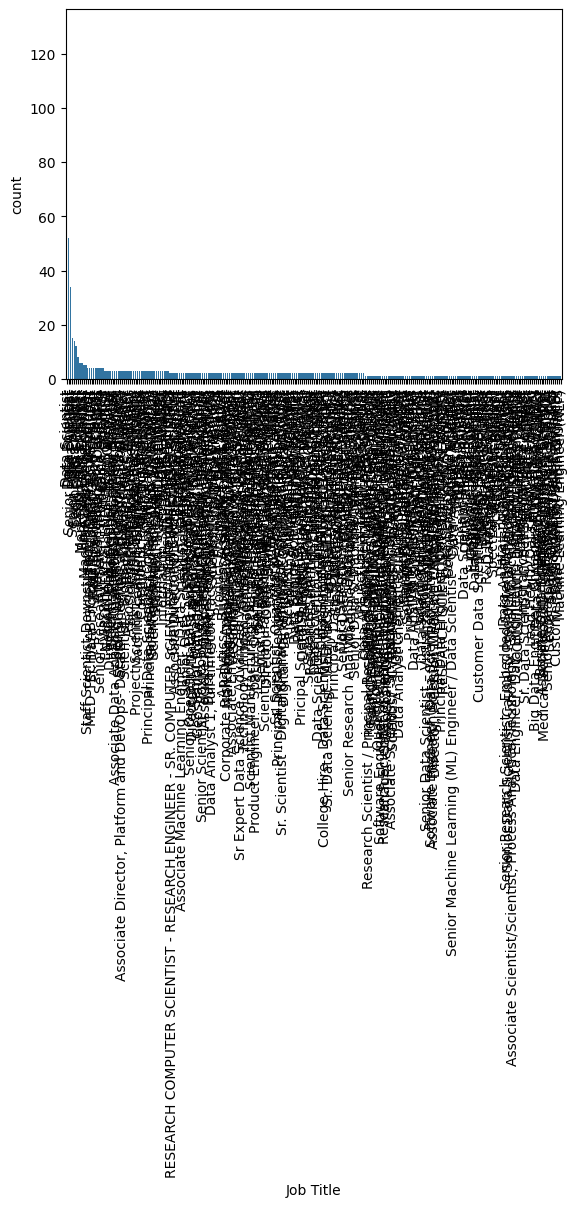

C:\Users\shiya\AppData\Local\Temp\ipykernel_10844\1188530860.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


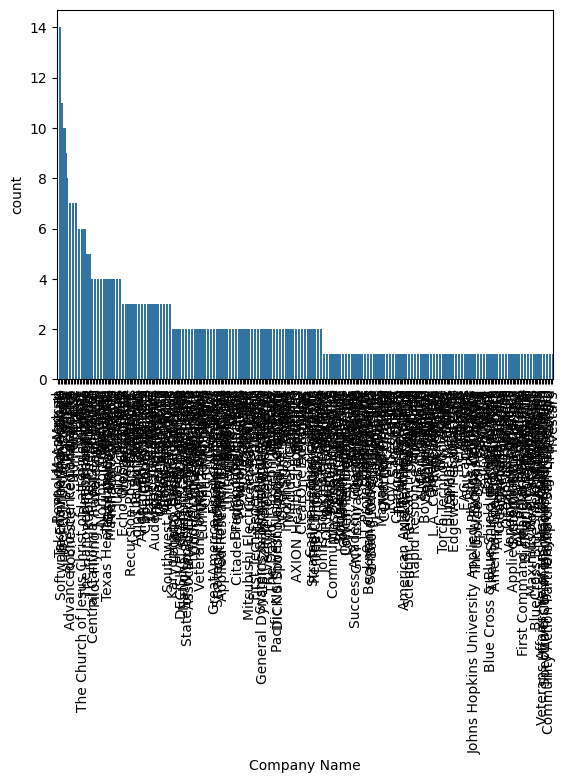

C:\Users\shiya\AppData\Local\Temp\ipykernel_10844\1188530860.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


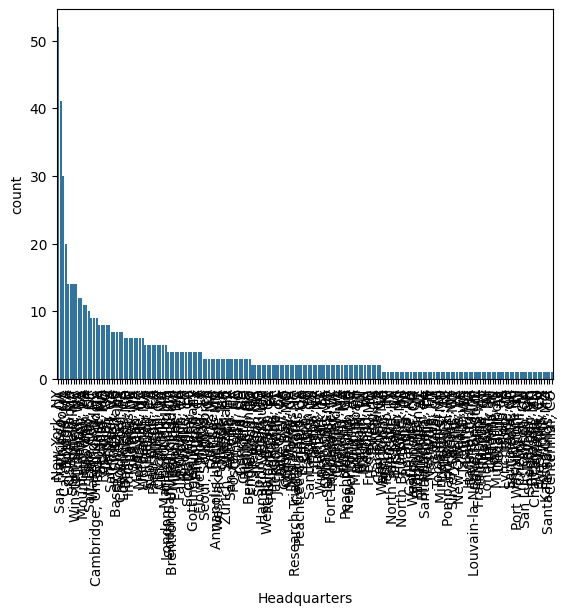

C:\Users\shiya\AppData\Local\Temp\ipykernel_10844\1188530860.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


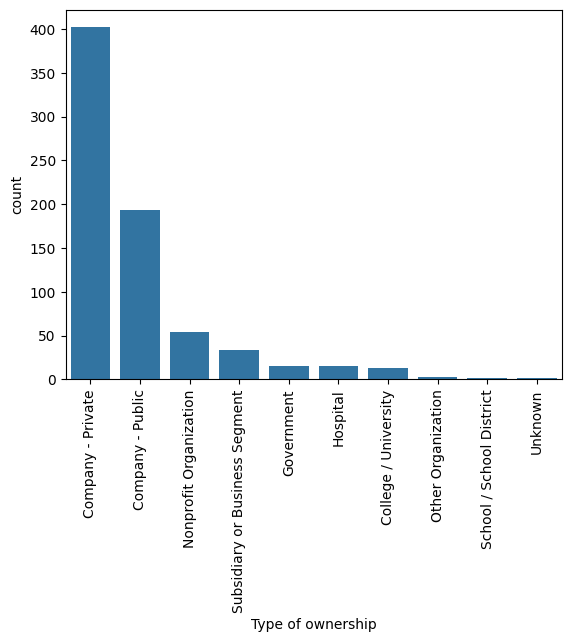

C:\Users\shiya\AppData\Local\Temp\ipykernel_10844\1188530860.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


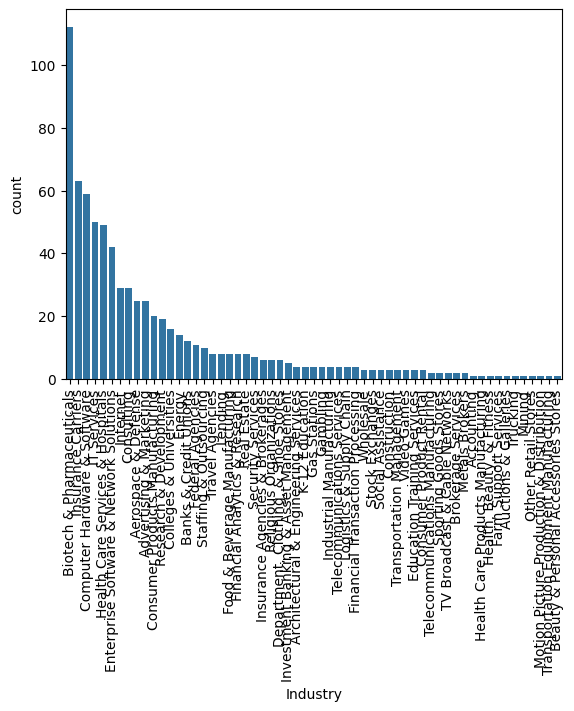

C:\Users\shiya\AppData\Local\Temp\ipykernel_10844\1188530860.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


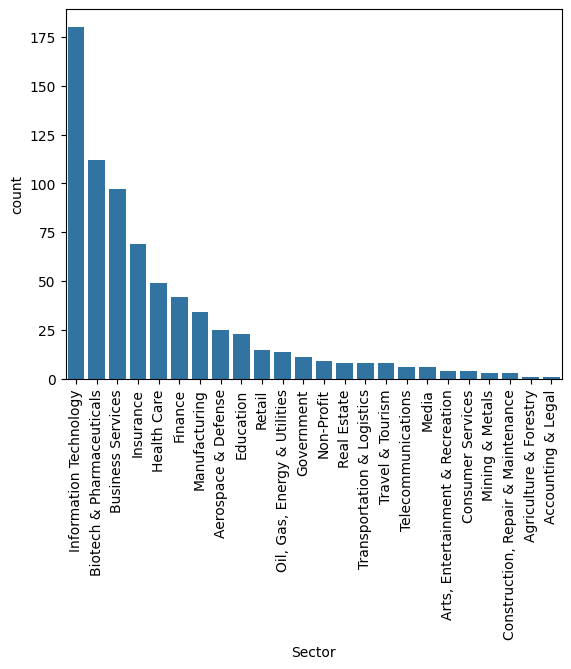

C:\Users\shiya\AppData\Local\Temp\ipykernel_10844\1188530860.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


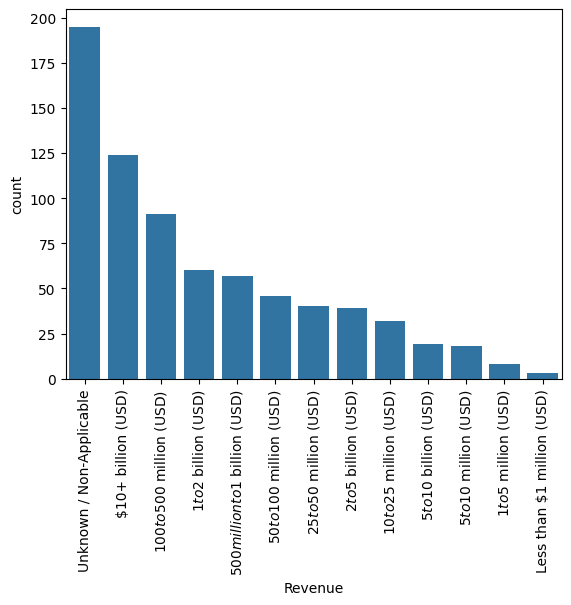

C:\Users\shiya\AppData\Local\Temp\ipykernel_10844\1188530860.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


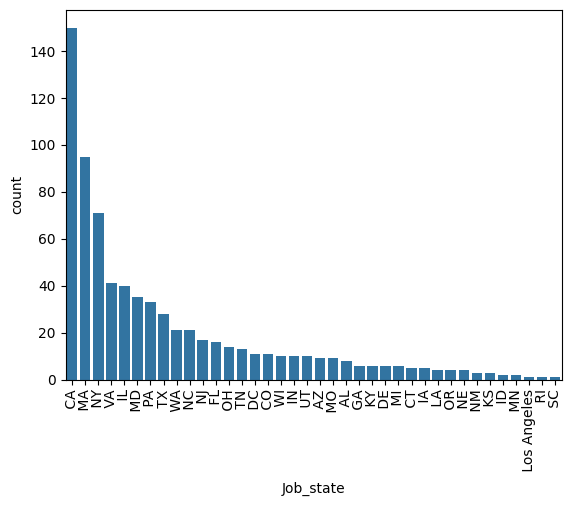

C:\Users\shiya\AppData\Local\Temp\ipykernel_10844\1188530860.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


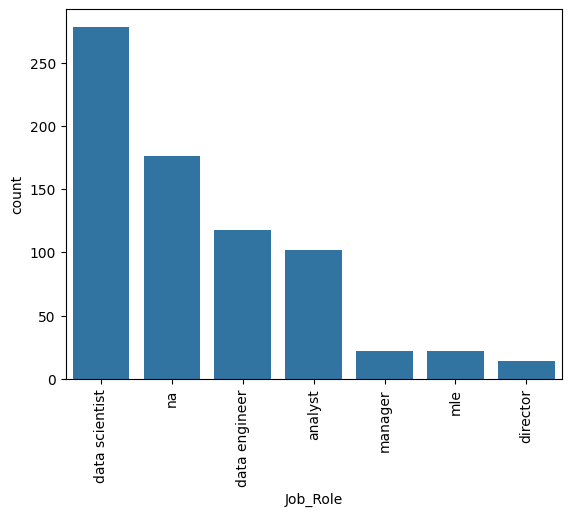

C:\Users\shiya\AppData\Local\Temp\ipykernel_10844\1188530860.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


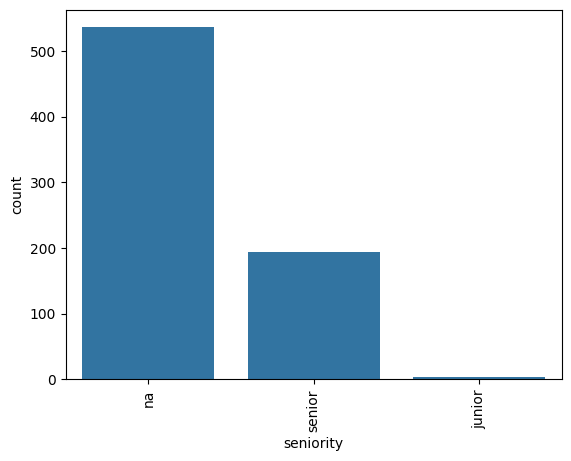

In [61]:
for i in catcols:
    chart=sns.barplot(x=df[i].value_counts().index,y=df[i].value_counts())
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [64]:
df.columns

Index(['Job Title', 'Rating', 'Company Name', 'Headquarters', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'Job_state', 'avg_salary', 'same_state', 'age', 'python',
       'Rstudio', 'spark', 'aws', 'excel', 'tableau', 'Job_Role', 'seniority'],
      dtype='object')

In [67]:
pd.pivot_table(df,index=['Job_Role','seniority'],values='avg_salary')

avg_salary
Job_Role       seniority               
analyst        junior      53250.000000
               na          61308.219178
               senior      84340.000000
data engineer  na          97481.707317
               senior     123638.888889
data scientist junior     106500.000000
               na         110525.641026
               senior     134524.390244
director       na         168607.142857
manager        na          84022.727273
mle            na         126218.750000
               senior     127000.000000
na             na          85361.607143
               senior     108142.857143

In [68]:
pd.pivot_table(df,index=['Job_state'],values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
Job_state,
CA,123860.000000
IL,116662.500000
DC,110181.818182
MA,108593.406593
Los Angeles,107500.000000
NJ,104558.823529
TX,100708.333333
TN,100500.000000
MI,100250.000000


In [69]:
pd.set_option('display.max_rows',None)


In [71]:
pd.set_option('display.max_columns',None)

In [ ]:
df